# Setup & Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import odeint
import seaborn as sns

SIRD Model from the practical

In [2]:
def sird_model(y, t, beta, gamma, mu):
    S, I, R, D = y  
    N = S + I + R + D

    dSdt = -beta * S * I / N  
    dIdt = beta * S * I / N - gamma * I - mu * I  
    dRdt = gamma * I  # Recovery rate
    dDdt = mu * I  # Death rate

    return dSdt, dIdt, dRdt, dDdt

In [3]:
def run_sird_simulation(beta, gamma, mu, N=1000, I0=10, days=150):
    S0 = N - I0
    R0 = 0
    D0 = 0
    y0 = [S0, I0, R0, D0]

    t = np.linspace(0, days, days)

    sol = odeint(sird_model, y0, t, args=(beta, gamma, mu))
    S, I, R, D = sol.T

    return t, S, I, R, D

# Part 1: Parameter Analysis Function

## function and documentation

Function that analyzes the effects of varring recovery rates. 

It outputs a dataframe of final results and creates a single visuzalization for all recovery rates gamma values.

Uses SIRD epidemiological model.

In [4]:
def analyze_recovery_rates(beta, mu, N, I0, simulation_days):
    """
    Analyze epidemic outcomes for different recovery rates.

    Parameters:
    -----------
    beta : float            Transmission rate
    mu : float              Mortality rate
    N : int                 Total population
    I0 : int                Initial infected individuals
    simulation_days : int   Simulation duration in days

    Returns:
    --------
    pandas.DataFrame        Results summary for each recovery rate
    """
    # Your implementation here
    
    # gamma values (recovery rates) to analyze:
    gamma_values = [0.05, 0.1, 0.15, 0.2, 0.25]
    
    # Dataframe structure (as a dictionery) to hold results, values to be filled in the function:
    results_dict = {'gamma': [], 'R0': [], 'peak_infected': [], 'peak_day': [], 'total_deaths': []} 
    
    # Create a multi-plot figure to visualize the epidemic curves for each gamma
    sns.set(style="white")
    fig, axes = plt.subplots(3, 2, figsize=(11, 10))
    axes = axes.flatten()
    fig.suptitle(f'SIRD Model Epidemic Curves for Different Recovery Rates (γ)\nParameters: β={beta}, μ={mu}, N={N}, I0={I0}', fontsize=16, y=0.98)
    plt.subplots_adjust(top=0.88, hspace=0.4, wspace=0.3)
    
    for i,gamma in enumerate(gamma_values): # loop over recovery rates the simulation defined abive and store results
        t, S, I, R, D = run_sird_simulation(beta, gamma, mu, N, I0, simulation_days)
        
        R0 = beta / gamma # basic reproduction number as defined in the instructions
        peak_infected = np.max(I) # maximum number of infected individuals
        peak_day = t[np.argmax(I)] # time T at which peak occurs
        total_deaths = D[-1] # deaths at the end of simulation
        
        # Append results to the dictionary
        results_dict['gamma'].append(gamma)
        results_dict['R0'].append(R0)
        results_dict['peak_infected'].append(peak_infected)
        results_dict['peak_day'].append(peak_day)
        results_dict['total_deaths'].append(total_deaths)
            
        # Plotting each gamma's epidemic curves on its own subplot
        ax = axes[i]
        ax.plot(t, S, color='blue', label='Susceptible', linewidth=2)
        ax.plot(t, I, color='red', label='Infectious', linewidth=2)
        ax.plot(t, R, color='green', label='Recovered', linewidth=2)
        ax.plot(t, D, color='black', label='Deaths', linewidth=2)
        ax.set_xlabel('Time (days)')
        ax.set_ylabel('Population')
        ax.set_title(f'γ={gamma}, R0={R0:.2f}', fontsize=12)
        ax.grid(True, alpha=0.6) 
    
    # GRAPH FORMATTING
    if len(gamma_values) < len(axes):
        for j in range(len(gamma_values), len(axes)):
            fig.delaxes(axes[j])
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower right', bbox_to_anchor=(0.95, 0.05),
               fontsize='medium', frameon=True, borderpad=1, shadow=True)
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.show()   
    # END OF GRAPH FORMATTING
        
    # Convert dictionary to DataFrame
    results = pd.DataFrame(results_dict)
    return results

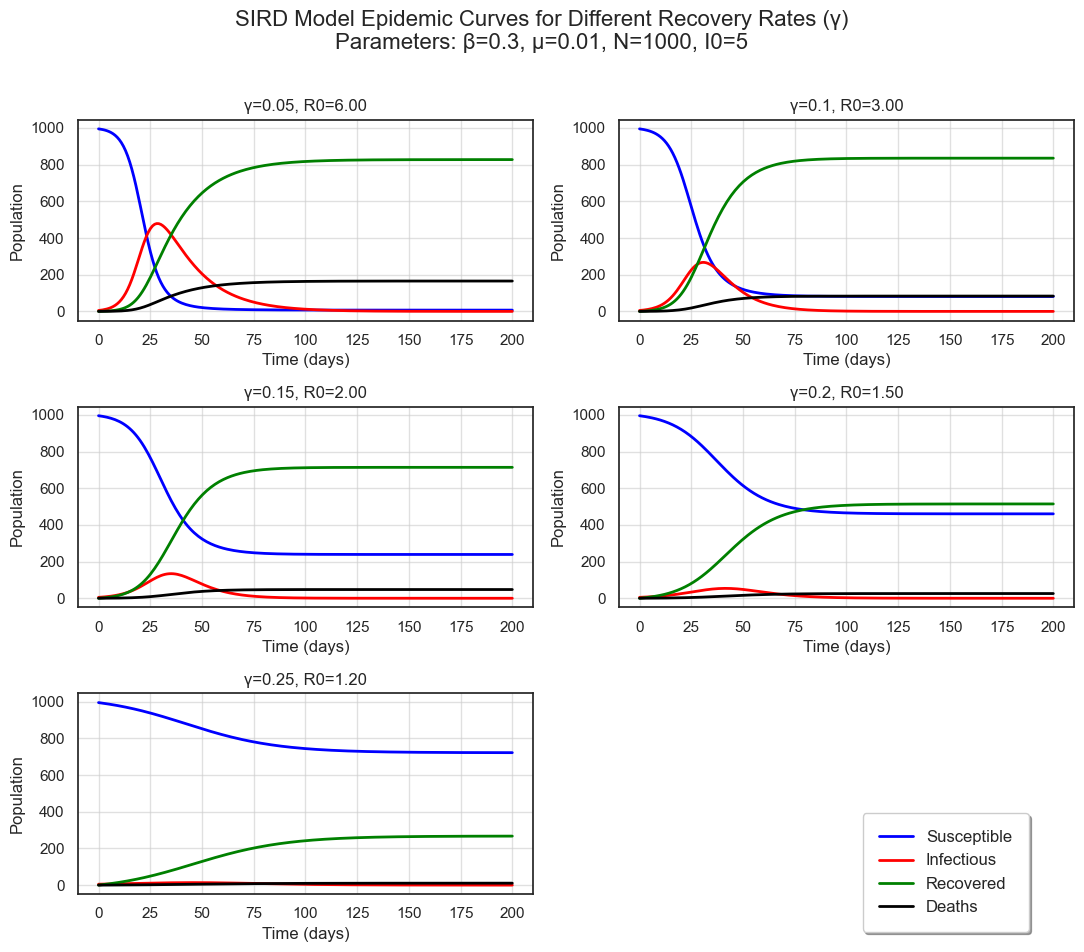

In [5]:
results = analyze_recovery_rates(beta=0.3, mu=0.01, N=1000, I0=5, simulation_days=200)

In [6]:
results # Display the results DataFrame

,gamma,R0,peak_infected,peak_day,total_deaths
0,0.05,6.0,478.829547,28.140704,165.503527
1,0.10,3.0,267.165542,31.155779,83.527148
2,0.15,2.0,134.078330,35.175879,47.578591
3,0.20,1.5,53.822406,41.206030,25.708403
4,0.25,1.2,13.655960,46.231156,10.686640


## Visualization of final results

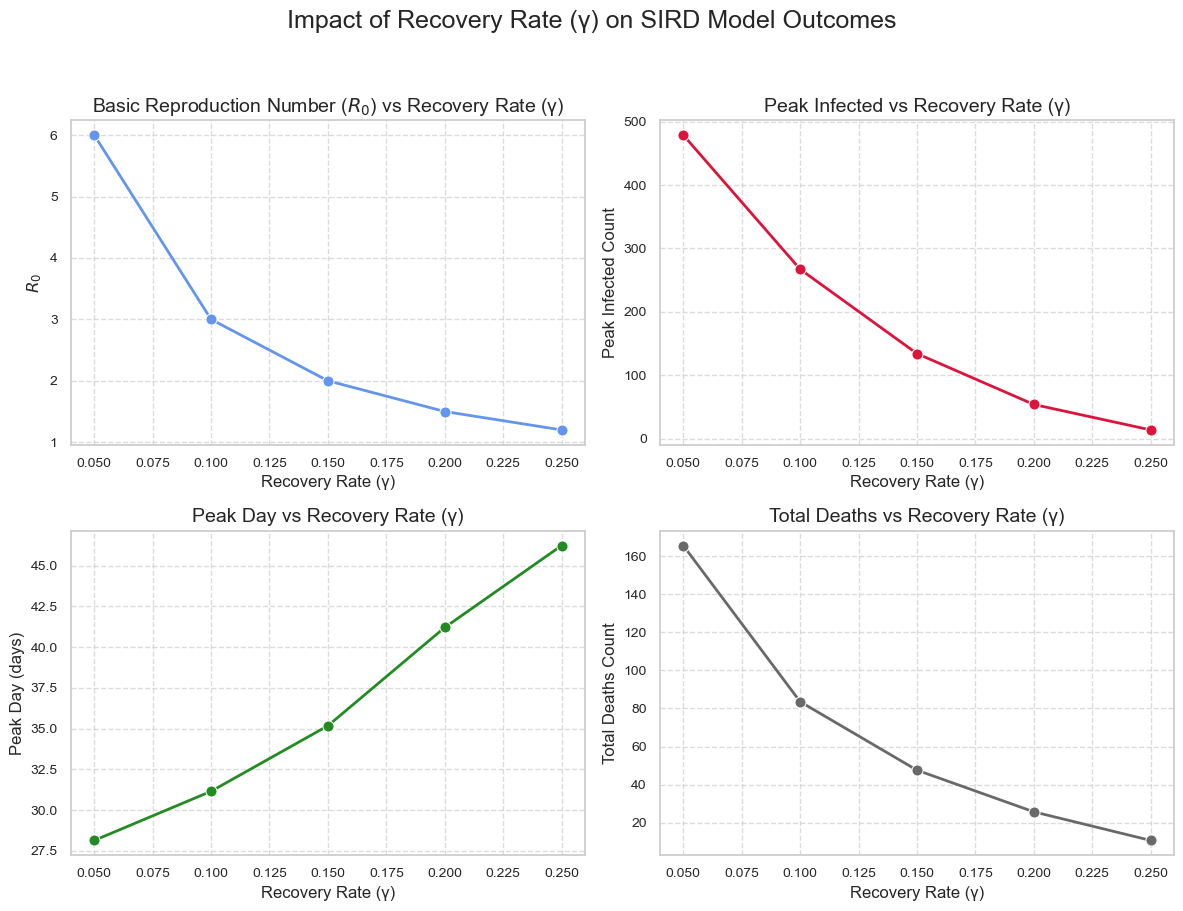

In [7]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 9)) 
fig.suptitle('Impact of Recovery Rate (γ) on SIRD Model Outcomes', fontsize=18, y=1.02) 

# Plot 1: Basic Reproduction Number (R0) vs Recovery Rate (γ)
sns.lineplot(data=results, x='gamma', y='R0', marker='o', ax=axes[0, 0], color='cornflowerblue', linewidth=2, markersize=8)
axes[0, 0].set_title('Basic Reproduction Number ($R_0$) vs Recovery Rate (γ)', fontsize=14)
axes[0, 0].set_xlabel('Recovery Rate (γ)', fontsize=12)
axes[0, 0].set_ylabel('$R_0$', fontsize=12)
axes[0, 0].grid(True, linestyle='--', alpha=0.7)
axes[0, 0].tick_params(axis='both', which='major', labelsize=10)

# Plot 2: Peak Infected vs Recovery Rate (γ)
sns.lineplot(data=results, x='gamma', y='peak_infected', marker='o', ax=axes[0, 1], color='crimson', linewidth=2, markersize=8)
axes[0, 1].set_title('Peak Infected vs Recovery Rate (γ)', fontsize=14)
axes[0, 1].set_xlabel('Recovery Rate (γ)', fontsize=12)
axes[0, 1].set_ylabel('Peak Infected Count', fontsize=12)
axes[0, 1].grid(True, linestyle='--', alpha=0.7)
axes[0, 1].tick_params(axis='both', which='major', labelsize=10)

# Plot 3: Peak Day vs Recovery Rate (γ)
sns.lineplot(data=results, x='gamma', y='peak_day', marker='o', ax=axes[1, 0], color='forestgreen', linewidth=2, markersize=8)
axes[1, 0].set_title('Peak Day vs Recovery Rate (γ)', fontsize=14)
axes[1, 0].set_xlabel('Recovery Rate (γ)', fontsize=12)
axes[1, 0].set_ylabel('Peak Day (days)', fontsize=12)
axes[1, 0].grid(True, linestyle='--', alpha=0.7)
axes[1, 0].tick_params(axis='both', which='major', labelsize=10)

# Plot 4: Total Deaths vs Recovery Rate (γ)
sns.lineplot(data=results, x='gamma', y='total_deaths', marker='o', ax=axes[1, 1], color='dimgray', linewidth=2, markersize=8)
axes[1, 1].set_title('Total Deaths vs Recovery Rate (γ)', fontsize=14)
axes[1, 1].set_xlabel('Recovery Rate (γ)', fontsize=12)
axes[1, 1].set_ylabel('Total Deaths Count', fontsize=12)
axes[1, 1].grid(True, linestyle='--', alpha=0.7)
axes[1, 1].tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout(rect=[0, 0.01, 1, 0.99]) 
plt.show()

# Part 2: Scenario Comparison

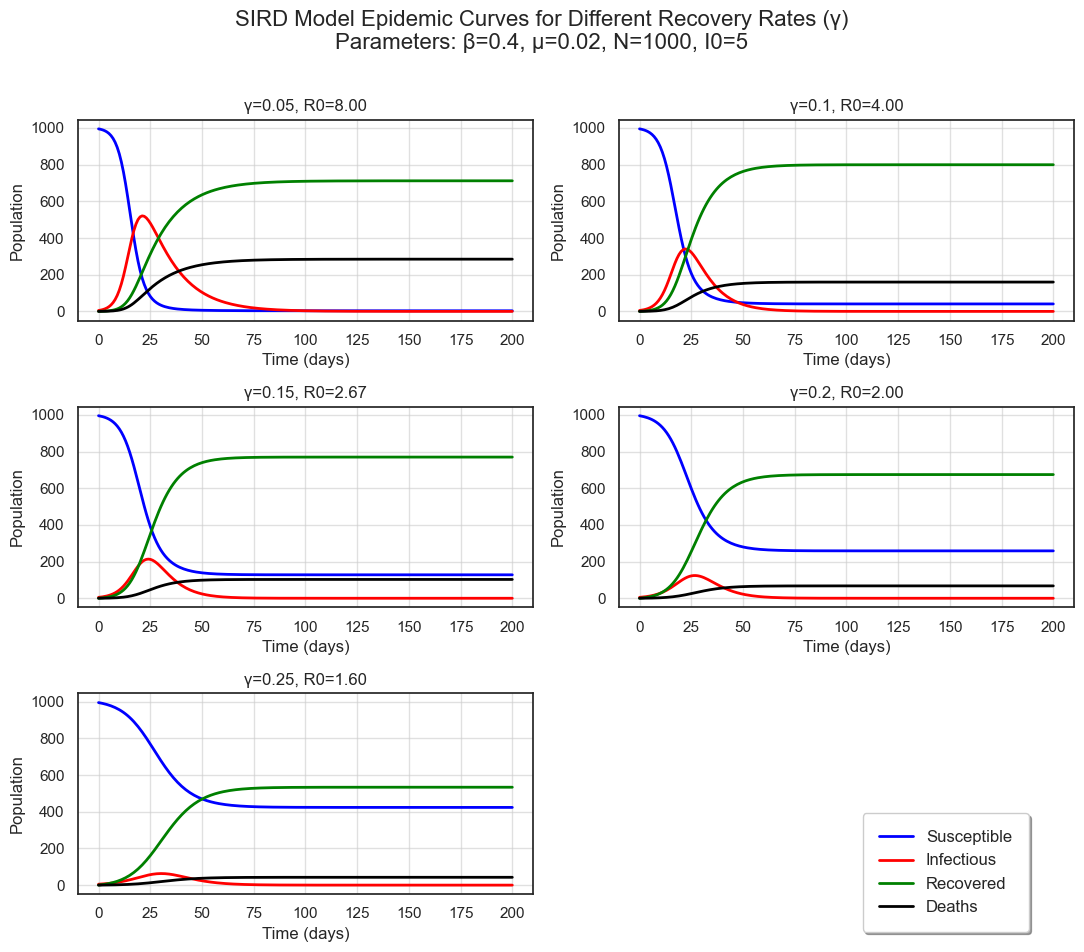

In [22]:
# scenario A = High Transmission
result_high_transmission = analyze_recovery_rates(
    beta=0.4, 
    mu=0.02, 
    N=1000, 
    I0=5, 
    simulation_days=200
)
result_high_transmission['scenario'] = 'High Transmission'

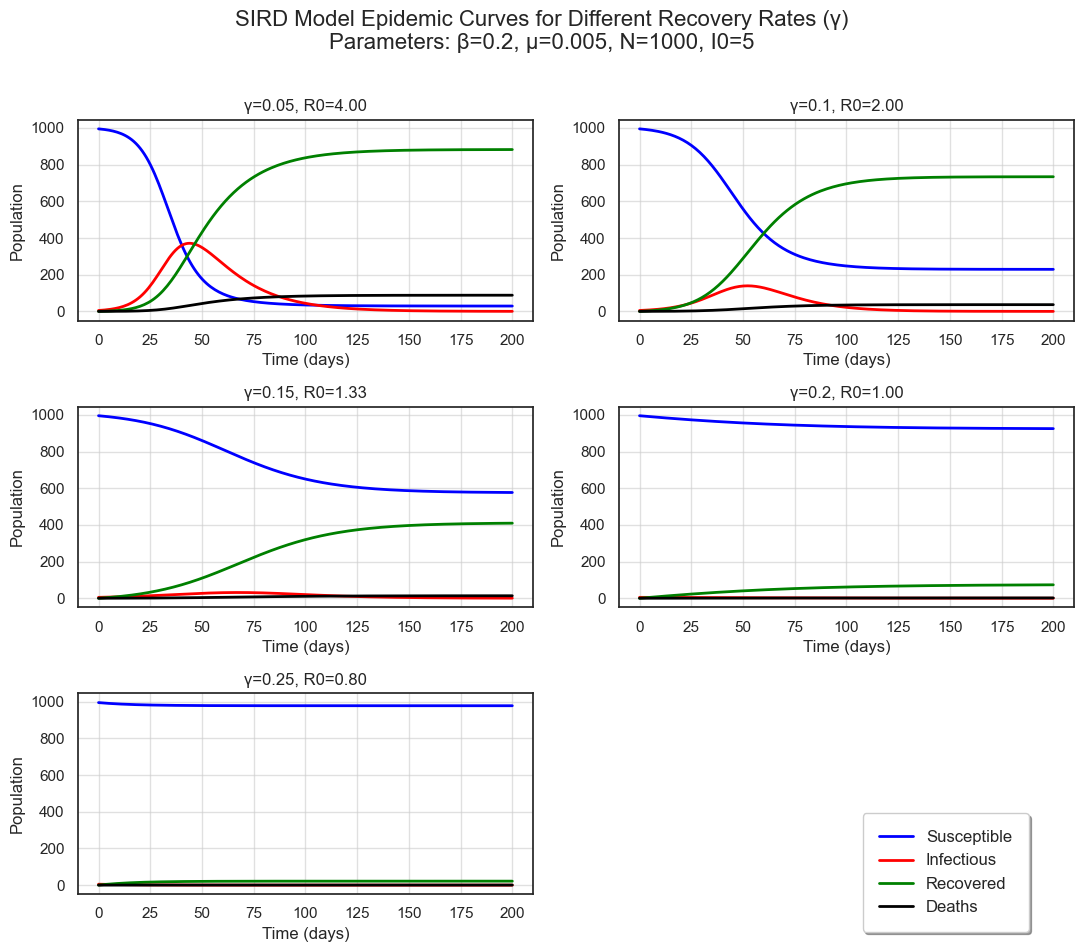

In [23]:
# scenario B = Low Transmission
result_low_transmission = analyze_recovery_rates(
    beta=0.2, 
    mu=0.005, 
    N=1000, 
    I0=5, 
    simulation_days=200
)
result_low_transmission['scenario'] = 'Low Transmission'

In [24]:
# display both result DataFrame
results = pd.concat([result_high_transmission, result_low_transmission], ignore_index=True)
print("Combined results for both scenarios:")
display(results)

Combined results for both scenarios:


,gamma,R0,peak_infected,peak_day,total_deaths,scenario
0,0.05,8.000000,520.757922,21.105528,284.757434,High Transmission
1,0.10,4.000000,340.259908,22.110553,159.892366,High Transmission
2,0.15,2.666667,213.467271,24.120603,102.610885,High Transmission
3,0.20,2.000000,123.830763,27.135678,67.423926,High Transmission
4,0.25,1.600000,63.070351,30.150754,42.694003,High Transmission
5,0.05,4.000000,371.304875,44.221106,88.225824,Low Transmission
6,0.10,2.000000,139.343938,52.261307,36.700237,Low Transmission
7,0.15,1.333333,31.343160,67.336683,13.642779,Low Transmission
8,0.20,1.000000,5.000000,0.000000,1.832013,Low Transmission
9,0.25,0.800000,5.000000,0.000000,0.433167,Low Transmission


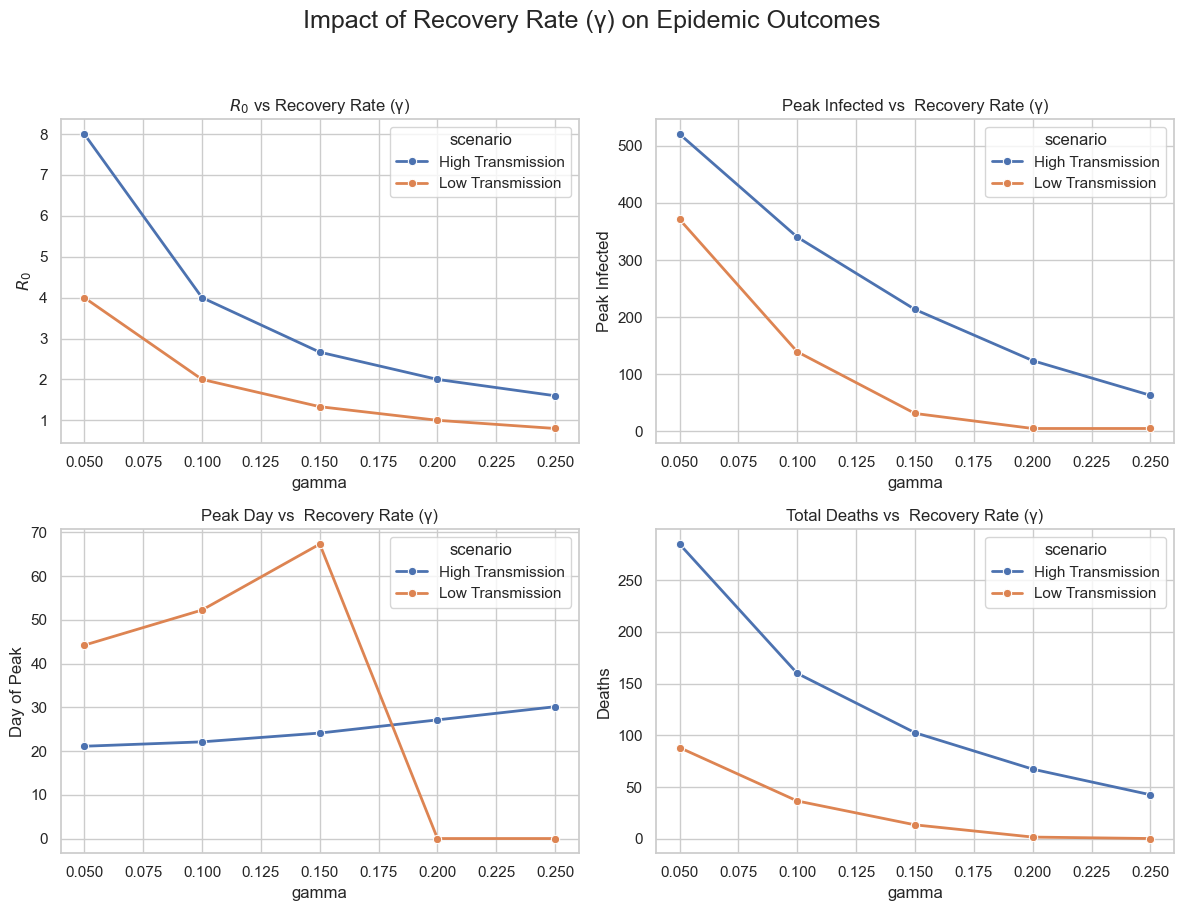

In [25]:
# creation of comparative visualization
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 9))
fig.suptitle('Impact of Recovery Rate (γ) on Epidemic Outcomes',
             fontsize=18, y=1.02)

# plot 1 = R0 vs Recovery Rate (gamma)
sns.lineplot(data=results, x='gamma', y='R0', hue='scenario', marker='o',
             ax=axes[0, 0], linewidth=2)
axes[0, 0].set_title('$R_0$ vs Recovery Rate (γ)')
axes[0, 0].set_ylabel('$R_0$')


# plot 2 = Peak Infected vs Recovery Rate
sns.lineplot(data=results, x='gamma', y='peak_infected', hue='scenario', marker='o',
             ax=axes[0, 1], linewidth=2)
axes[0, 1].set_title('Peak Infected vs  Recovery Rate (γ)')
axes[0, 1].set_ylabel('Peak Infected')

# plot 3 = Peak Day vs Recovery Rate
sns.lineplot(data=results, x='gamma', y='peak_day', hue='scenario', marker='o',
             ax=axes[1, 0], linewidth=2)
axes[1, 0].set_title('Peak Day vs  Recovery Rate (γ)')
axes[1, 0].set_ylabel('Day of Peak')

# plot 4 = Total Deaths vs Recovery rate
sns.lineplot(data=results, x='gamma', y='total_deaths', hue='scenario', marker='o',
             ax=axes[1, 1], linewidth=2)
axes[1, 1].set_title('Total Deaths vs  Recovery Rate (γ)')
axes[1, 1].set_ylabel('Deaths')

plt.tight_layout(rect=[0, 0.01, 1, 0.99])
plt.show()

When comparing the two scenarios, the 'High Transmission' setting 
(β = 0.4, μ = 0.02) is clearly worse for public health than the 'Low Transmission'
setting (β = 0.2, μ = 0.005).

- Basic Reproduction Number ($R_0$): in the High Transmission scenario, $R_0$ 
starts much higher, meaning each infected person generates more secondary 
infections and this accelerates the epidemic spread.
- Peak Infected: the maximum number of people infected at one time
is higher in cases of High Transmission, which could make it difficult to manage the healthcare system.
- Peak Day: the peak occurs earlier in High Transmission, leaving less time 
for interventions such as vaccination or social distancing.
- Total Deaths: mortality is always higher in High Transmission, even 
when the recovery rate (γ) increases.

In contrast, the Low Transmission scenario results in smaller epidemic peaks, 
fewer deaths, and in some cases the epidemic can die out naturally if recovery 
rates are sufficiently high.  

Public health interventions should therefore aim to reduce 
transmission rates (β) and increase recovery rates (γ) to keep the epidemic 
under control.

# Part 3: Policy Recommendations

# Conclusions